In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("F:/data science course/datasets/iris.csv")

In [3]:
data.head()

,no,sepal_length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.describe()

,no,sepal_length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isnull().sum()  #finding null values in dataset

no              0
sepal_length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

In [7]:
data.drop(['no'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [10]:
data['species']=data['Species'].map({'setosa':0,'versicolor':1,'virginica':2})   # mapping the Species column
data.head()

,sepal_length,Sepal_Width,Petal_Length,Petal_Width,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [11]:
data.drop(['Species'],axis=1,inplace=True)

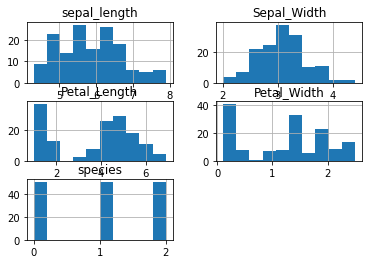

In [12]:
data.hist()
plt.show()

<AxesSubplot:>

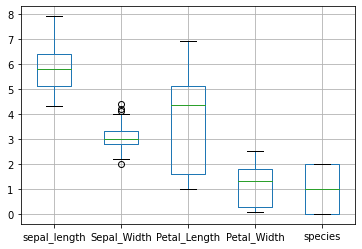

In [13]:
data.boxplot()

In [14]:
x=data.drop(['species'],axis=1)
y=data['species']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=1,test_size=0.3)  #spliting the dataset

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [19]:
ypred=model.predict(xtest)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
accuracy_score(ytest,ypred)

0.9777777777777777

In [22]:
confusion_matrix(ytest,ypred)

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [23]:
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

